# Dateframe information

# Reading in the df and having a first look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('//datc//opschaler//weather_data//knmi_10_min_raw_data//output//df_combined_uncleaned.csv', delimiter='\t', parse_dates=['datetime'])
df = df.set_index(['datetime'])
df.head()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,
2015-01-01 00:20:00,200.7,0.0,4.97,6.90,0.0,1033.9,0.0,0.0,0.0,3.2,2.3,1.0,85.0,3650.0,10.0
2015-01-01 00:30:00,209.0,0.0,4.84,6.84,0.0,1034.3,0.0,0.0,0.0,3.1,2.1,0.9,85.0,3151.0,10.0
2015-01-01 00:40:00,212.9,0.0,5.03,6.70,0.0,1034.1,0.0,0.0,0.0,3.4,2.1,1.0,84.0,5830.0,10.0
2015-01-01 00:50:00,213.9,0.0,4.92,7.30,0.0,1034.2,0.0,0.0,0.0,3.2,2.3,0.9,84.0,6900.0,10.0
2015-01-01 01:00:00,214.6,0.0,5.15,8.29,0.0,1034.3,0.0,0.0,0.0,3.6,2.3,0.9,82.0,8780.0,10.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194248 entries, 2015-01-01 00:20:00 to 2018-09-10 23:50:00
Data columns (total 15 columns):
DD     173429 non-null float64
DR     192783 non-null float64
FF     173429 non-null float64
FX     173429 non-null float64
N      192612 non-null float64
P      192842 non-null float64
Q      192810 non-null float64
RG     192843 non-null float64
SQ     192825 non-null float64
T      192828 non-null float64
T10    192811 non-null float64
TD     192827 non-null float64
U      192827 non-null float64
VV     192696 non-null float64
WW     192770 non-null float64
dtypes: float64(15)
memory usage: 23.7 MB


In [20]:
df.describe()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
count,173429.000000,192783.000000,173429.000000,173429.000000,192612.000000,192842.000000,192810.000000,192843.000000,192825.000000,192828.000000,192811.000000,192827.000000,192827.000000,192696.000000,192770.000000
mean,197.188189,47.269479,4.338159,6.457601,4.527960,1015.983677,132.365824,0.102122,2.243176,11.370061,10.822624,7.783012,79.813211,21756.506925,12.998835
std,93.612039,148.287690,2.629547,3.855367,3.559168,9.782878,212.635463,0.777468,4.000189,6.645344,7.333862,5.608731,14.298392,13296.464517,20.792795
min,0.000000,0.000000,0.000000,0.000000,0.000000,967.950000,0.000000,0.000000,0.000000,-8.000000,-10.300000,-14.300000,19.000000,92.000000,0.000000
25%,120.500000,0.000000,2.390000,3.560000,0.000000,1010.700000,0.000000,0.000000,0.000000,6.400000,5.600000,3.600000,71.000000,10600.000000,2.000000
50%,213.700000,0.000000,3.910000,5.870000,6.000000,1016.900000,7.000000,0.000000,0.000000,11.200000,10.500000,8.100000,82.000000,20200.000000,3.000000
75%,262.500000,0.000000,5.770000,8.620000,8.000000,1022.400000,185.000000,0.000000,1.934500,16.300000,15.900000,12.300000,91.000000,31900.000000,10.000000
max,359.900000,600.000000,21.050000,32.070000,9.000000,1045.500000,1080.000000,78.000000,10.000000,35.900000,37.700000,22.500000,100.000000,49900.000000,91.000000


# Check for missing data

In [3]:
df.isnull().sum()

DD     20819
DR      1465
FF     20819
FX     20819
N       1636
P       1406
Q       1438
RG      1405
SQ      1423
T       1420
T10     1437
TD      1421
U       1421
VV      1552
WW      1478
dtype: int64

## Inspect the NaNs further
DD,FF,FX have got 'a lot' of NaNs.  

DD=Mean wind direction in degrees.  
FF=Mean wind speed (at 10 m) in m/s.  
FX=Max wind blast (at 10 m.) in m/s.  

Later on decide what to do with them?
-> Create df_nans which only contains rows with a NaN. Later on inspect the csv file to see how the NaNs are devided.

In [4]:
# Return a df with all the NaNs
df_nans = df[df.isnull().any(axis=1)]
# Finally, save the dataframe
df_nans.to_csv('//datc//opschaler//weather_data//knmi_10_min_raw_data//output//df_combined_NaNs.csv', sep='\t', index=True)
df_nans.loc['2016-08-01':,:]

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,
2016-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When inspecting 'df_combined_NaNs.csv' one can see that most NaNs are at 00:00:00. 
Some others are randomly placed. Interpolation looks fine to do, as a quick tool to deal with the NaNs.

# Dealing with the NaNs

In [9]:
df_filled = df.resample('10min').interpolate(method='time')
df_filled.describe()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
count,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000,194254.000000
mean,190.737150,47.305945,4.327577,6.390125,4.524465,1015.984842,131.534454,0.102486,2.227952,11.359787,10.806231,7.782909,79.861522,21735.036092,13.008277
std,91.671611,148.300619,2.494210,3.661299,3.558559,9.781130,212.240732,0.787959,3.990433,6.641428,7.329359,5.608995,14.282593,13302.295833,20.787341
min,0.000000,0.000000,0.000000,0.000000,0.000000,967.950000,0.000000,0.000000,0.000000,-8.000000,-10.300000,-14.300000,19.000000,92.000000,0.000000
25%,112.746630,0.000000,2.550000,3.830000,0.000000,1010.700000,0.000000,0.000000,0.000000,6.400000,5.600000,3.600000,71.000000,10600.000000,2.000000
50%,200.900000,0.000000,4.140363,5.857345,6.000000,1016.900000,6.000000,0.000000,0.000000,11.200000,10.400000,8.100000,83.000000,20200.000000,3.000000
75%,256.700000,0.000000,5.497500,8.200000,8.000000,1022.400000,182.000000,0.000000,1.762900,16.300000,15.900000,12.300000,91.000000,31900.000000,10.000000
max,359.900000,600.000000,21.050000,32.070000,9.000000,1045.500000,1080.000000,78.000000,10.000000,35.900000,37.700000,22.500000,100.000000,49900.000000,91.000000


# Check for 'major' changes after interpolating

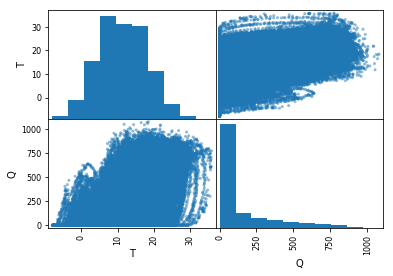

In [10]:
_ = pd.plotting.scatter_matrix(df[['T', 'Q']], marker='.')

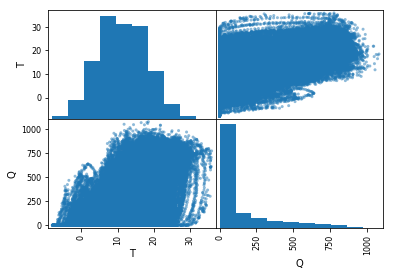

In [11]:
_ = pd.plotting.scatter_matrix(df_filled[['T', 'Q']], marker='.')

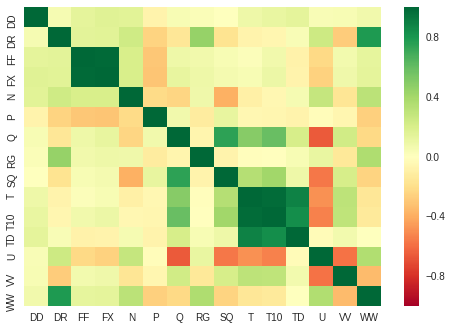

In [15]:
import seaborn as sns

sns.heatmap(df.corr(), square=False, cmap='RdYlGn')

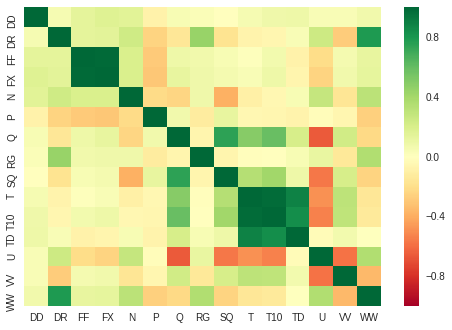

In [16]:
sns.heatmap(df_filled.corr(), square=False, cmap='RdYlGn')

Conclusion: By eyeballing the interpolated data looks the same as the one with the NaNs. So interpolation might be fine to do?

In [22]:
df_nans_final = df_filled[df_filled.isnull().any(axis=1)]
df_nans_final

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,


# Upsample df_filled
Upsample from 10 min to a 10 second resolution by interpolation. This is to match the smartmeter resolution. Note that for some columns inteprolation probably is not the best thing to do. But that's a detail to deal with later?

In [23]:
df_final = df_filled.resample('10s').interpolate(method='time')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11655181 entries, 2015-01-01 00:20:00 to 2018-09-10 23:50:00
Freq: 10S
Data columns (total 15 columns):
DD     float64
DR     float64
FF     float64
FX     float64
N      float64
P      float64
Q      float64
RG     float64
SQ     float64
T      float64
T10    float64
TD     float64
U      float64
VV     float64
WW     float64
dtypes: float64(15)
memory usage: 1.4 GB


# Compare df_final with the original df.

In [24]:
df_final.describe()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
count,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07,1.165518e+07
mean,1.907370e+02,4.730618e+01,4.327572e+00,6.390118e+00,4.524479e+00,1.015985e+03,1.315351e+02,1.024861e-01,2.227963e+00,1.135979e+01,1.080624e+01,7.782911e+00,7.986149e+01,2.173506e+04,1.300831e+01
std,8.974946e+01,1.447616e+02,2.483908e+00,3.640216e+00,3.501009e+00,9.780957e+00,2.110680e+02,7.280965e-01,3.901483e+00,6.640026e+00,7.327562e+00,5.607025e+00,1.426429e+01,1.317985e+04,2.018008e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.679500e+02,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000e+00,-1.030000e+01,-1.430000e+01,1.900000e+01,9.200000e+01,0.000000e+00
25%,1.142900e+02,0.000000e+00,2.560667e+00,3.838500e+00,0.000000e+00,1.010700e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.421667e+00,5.606667e+00,3.606667e+00,7.100000e+01,1.069333e+04,2.000000e+00
50%,2.006600e+02,0.000000e+00,4.145032e+00,5.860833e+00,6.000000e+00,1.016900e+03,6.300000e+00,0.000000e+00,0.000000e+00,1.123333e+01,1.044833e+01,8.100000e+00,8.256667e+01,2.027500e+04,2.800000e+00
75%,2.558367e+02,0.000000e+00,5.487333e+00,8.204000e+00,8.000000e+00,1.022400e+03,1.845000e+02,0.000000e+00,2.667645e+00,1.628000e+01,1.590000e+01,1.226000e+01,9.123333e+01,3.192833e+04,1.000000e+01
max,3.599000e+02,6.000000e+02,2.105000e+01,3.207000e+01,9.000000e+00,1.045500e+03,1.080000e+03,7.800000e+01,1.000000e+01,3.590000e+01,3.770000e+01,2.250000e+01,1.000000e+02,4.990000e+04,9.100000e+01


In [25]:
df.describe()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
count,173429.000000,192783.000000,173429.000000,173429.000000,192612.000000,192842.000000,192810.000000,192843.000000,192825.000000,192828.000000,192811.000000,192827.000000,192827.000000,192696.000000,192770.000000
mean,197.188189,47.269479,4.338159,6.457601,4.527960,1015.983677,132.365824,0.102122,2.243176,11.370061,10.822624,7.783012,79.813211,21756.506925,12.998835
std,93.612039,148.287690,2.629547,3.855367,3.559168,9.782878,212.635463,0.777468,4.000189,6.645344,7.333862,5.608731,14.298392,13296.464517,20.792795
min,0.000000,0.000000,0.000000,0.000000,0.000000,967.950000,0.000000,0.000000,0.000000,-8.000000,-10.300000,-14.300000,19.000000,92.000000,0.000000
25%,120.500000,0.000000,2.390000,3.560000,0.000000,1010.700000,0.000000,0.000000,0.000000,6.400000,5.600000,3.600000,71.000000,10600.000000,2.000000
50%,213.700000,0.000000,3.910000,5.870000,6.000000,1016.900000,7.000000,0.000000,0.000000,11.200000,10.500000,8.100000,82.000000,20200.000000,3.000000
75%,262.500000,0.000000,5.770000,8.620000,8.000000,1022.400000,185.000000,0.000000,1.934500,16.300000,15.900000,12.300000,91.000000,31900.000000,10.000000
max,359.900000,600.000000,21.050000,32.070000,9.000000,1045.500000,1080.000000,78.000000,10.000000,35.900000,37.700000,22.500000,100.000000,49900.000000,91.000000


## Actual difference  between df_final and the original df
The difference looks minimal, that's good.

In [26]:
df_final.describe() - df.describe()

,DD,DR,FF,FX,N,P,Q,RG,SQ,T,T10,TD,U,VV,WW
count,1.148175e+07,1.146240e+07,1.148175e+07,1.148175e+07,1.146257e+07,1.146234e+07,1.146237e+07,1.146234e+07,1.146236e+07,1.146235e+07,1.146237e+07,1.146235e+07,1.146235e+07,1.146248e+07,1.146241e+07
mean,-6.451139e+00,3.670511e-02,-1.058722e-02,-6.748344e-02,-3.480920e-03,1.108917e-03,-8.307044e-01,3.638605e-04,-1.521293e-02,-1.026619e-02,-1.638090e-02,-1.019574e-04,4.828216e-02,-2.145091e+01,9.476612e-03
std,-3.862578e+00,-3.526074e+00,-1.456392e-01,-2.151514e-01,-5.815847e-02,-1.920994e-03,-1.567422e+00,-4.937128e-02,-9.870663e-02,-5.317432e-03,-6.300598e-03,-1.706262e-03,-3.410142e-02,-1.166128e+02,-6.127140e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.210000e+00,0.000000e+00,1.706667e-01,2.785000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.166667e-02,6.666667e-03,6.666667e-03,0.000000e+00,9.333333e+01,0.000000e+00
50%,-1.304000e+01,0.000000e+00,2.350319e-01,-9.166667e-03,0.000000e+00,0.000000e+00,-7.000000e-01,0.000000e+00,0.000000e+00,3.333333e-02,-5.166667e-02,0.000000e+00,5.666667e-01,7.500000e+01,-2.000000e-01
75%,-6.663333e+00,0.000000e+00,-2.826667e-01,-4.160000e-01,0.000000e+00,0.000000e+00,-5.000000e-01,0.000000e+00,7.331450e-01,-2.000000e-02,0.000000e+00,-4.000000e-02,2.333333e-01,2.833333e+01,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# Save the final dataframe

In [ ]:
"""
Finally, save the dataframe.
Manually add the column information (received by mail) as '#' comments in the file.
"""
df_final.to_csv('//datc//opschaler//weather_data//knmi_10_min_raw_data//output//weather.csv', sep='\t')